it doesn't have any model, it stores all example in the training set 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from KNN import KNN

In [2]:
def EuclideanDistance(x1, x2) : 
    dist = np.sum((x1 - x2)**2, axis =1)
    return dist 

def ManhattanDistance(x1, x2) : 
    dist = np.sum(np.abs(x1 - x2), axis = 1)
    return dist

In [3]:
X, y = make_blobs(
    n_samples= 100, 
    n_features = 2, 
    centers = [[0, 0], [5,5]], 
    cluster_std = 1, 
    random_state = 12
)

In [4]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


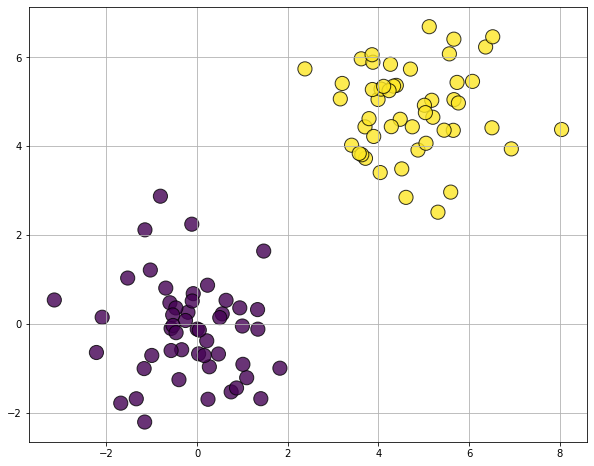

In [5]:
plt.figure(figsize= (10, 8))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 200, edgecolors= 'k', alpha = 0.8)
plt.show()

In [6]:
newExample = np.array([2.2, 2.2])

model = KNN(3, distance_metric=EuclideanDistance)

model.fit(X, y)

prediction, nearest_neighbours_indices = model.predict(newExample.reshape(1, 2))

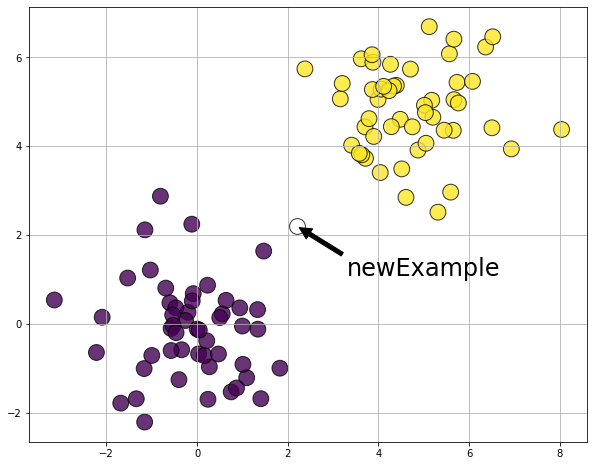

In [7]:
plt.figure(figsize= (10, 8))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 250, edgecolors= 'k', alpha = 0.8)
plt.scatter(newExample[0], newExample[1], marker = 'o', c = 'white', s = 250, edgecolors= 'k', alpha = 0.8)
plt.annotate('newExample', xy = newExample, xytext = (50, -50), textcoords = 'offset points', arrowprops = dict(facecolor = 'black', shrink = 0.05), fontsize = 24)
plt.show()

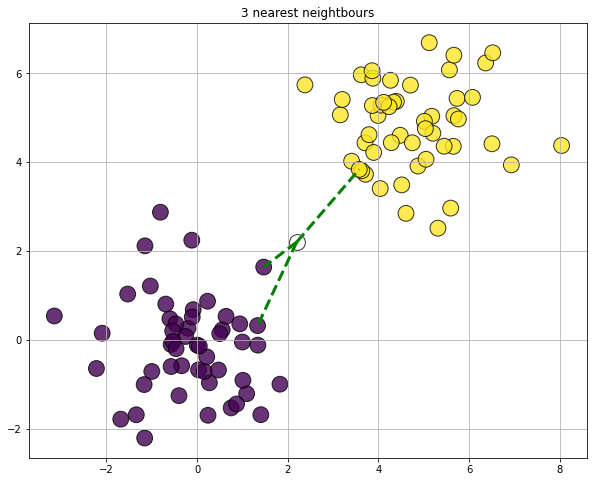

In [8]:
plt.figure(figsize= (10, 8))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 250, edgecolors= 'k', alpha = 0.8)
plt.scatter(newExample[0], newExample[1], marker = 'o', c = 'white', s = 250, edgecolors= 'k', alpha = 0.8)

for xi in X[nearest_neighbours_indices] : 
    plt.plot([newExample[0], xi[0]], [newExample[1], xi[1]], 'g--', linewidth = 3)
plt.title('3 nearest neightbours')
plt.show()

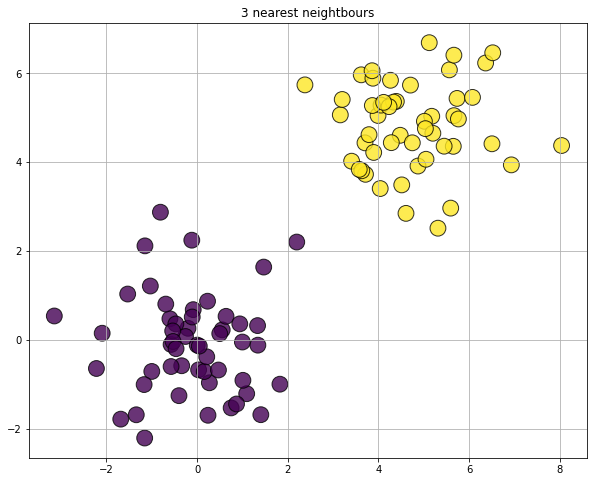

In [9]:
plt.figure(figsize= (10, 8))
plt.grid(True)
tx = np.concatenate((X, newExample.reshape(1, 2)), axis = 0)
ty = np.concatenate((y, prediction), axis = 0)
plt.scatter(tx[:, 0], tx[:, 1], marker = 'o', c = ty, s = 250, edgecolors= 'k', alpha = 0.8)

plt.title('3 nearest neightbours')
plt.show()

In [10]:
def draw_decision_boundary(model, axis_chart, num_points = 201, opacity = 0.05) : 
    tx = np.linspace(
        np.min(model._x[:, 0], axis = 0)-2, 
        np.max(model._x[:, 0], axis = 0)+2, num_points
    )
    ty = np.linspace(
        np.min(model._x[:, 1], axis = 0)-2, 
        np.max(model._x[:, 1], axis = 0)+2, num_points
    )

    xx, yy = np.meshgrid(tx, ty)
    grid_prediction = np.zeros(xx.shape)

    for i in range(num_points) : 
        for j in range(num_points) : 
            grid_prediction[i][j], _ = model.predict([xx[i][j], yy[i][j]])

    axis_chart.scatter(
        xx.ravel(), yy.ravel(), c = grid_prediction.ravel(), alpha = opacity
    )


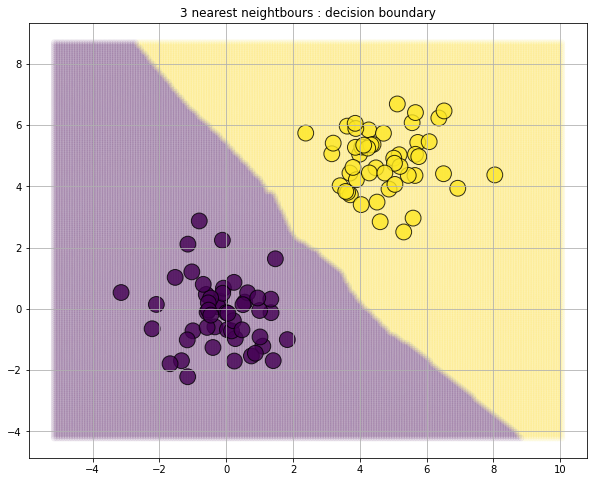

In [11]:
plt.figure(figsize= (10, 8))
current_axis = plt.gca()
plt.grid(True)
draw_decision_boundary(model, current_axis)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 250, edgecolors= 'k', alpha = 0.8)

plt.title('3 nearest neightbours : decision boundary')
plt.show()

In [12]:
def make_two_spirals(num_points=1000, rotations = 2, noise = 0.5):
    '''Make  a synthetic dataset of two classes in the form of spirals
    Args: 
        num_points: No. of points to be gereated per spiral
        rotations: How many times a spiral shoul rotate
        noise: noise factor

    Returns:
        Coordinates and class vectors of the two spirals
    '''

    n = np.sqrt(np.random.rand(num_points, 1)) * rotations * (2 * np.pi)
    rx = -np.cos(n) * n + np.random.rand(num_points, 1) * noise
    ry = np.sin(n) * n + np.random.rand(num_points, 1) * noise

    return (np.concatenate((np.hstack((rx, ry)),
                            np.hstack((-rx, -ry))),
                                        axis = 0),
            np.concatenate((np.zeros(num_points),
                            np.ones(num_points)),
                            axis = 0))

X_spiral, y_spiral = make_two_spirals()

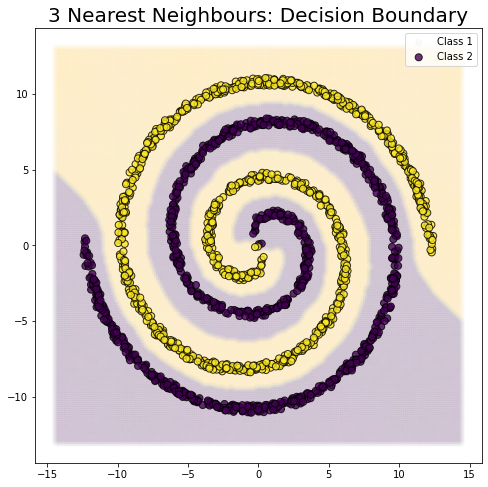

In [13]:
plt.figure(figsize=(8,8))

model = KNN(3)
model.fit(X_spiral, y_spiral)

draw_decision_boundary(model, plt.gca(), opacity=0.02)

plt.scatter(X_spiral[:, 0 ], X_spiral[:, 1], marker='o', c = y_spiral,
            s = 50, edgecolors='k', alpha=0.8)

plt.title("3 Nearest Neighbours: Decision Boundary", fontsize=20)
plt.legend(['Class 1', 'Class 2'])
plt.show()

## Regression

In [14]:
np.random.seed(42)

w1 = 3
w0 = 4
n = 100

X = 2 * np.random.rand(n,)
y = w0 + w1 * X + np.random.randn(n,)

In [15]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [16]:
print("Shape of the training data feature matrix: ", X.shape)
print("Shape of label vector: ", y.shape)

Shape of the training data feature matrix:  (100, 1)
Shape of label vector:  (100, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

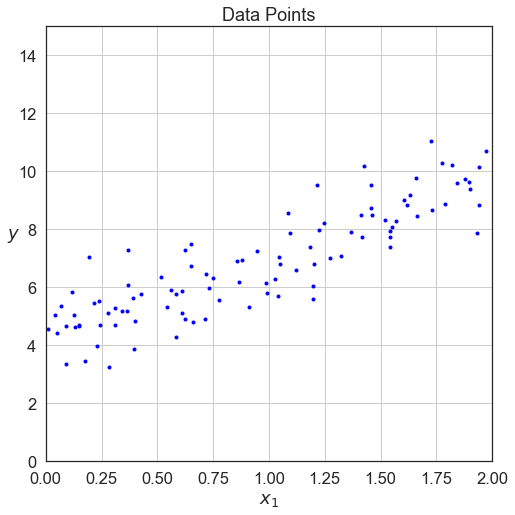

In [18]:
sns.set_style("white")
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(X, y, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

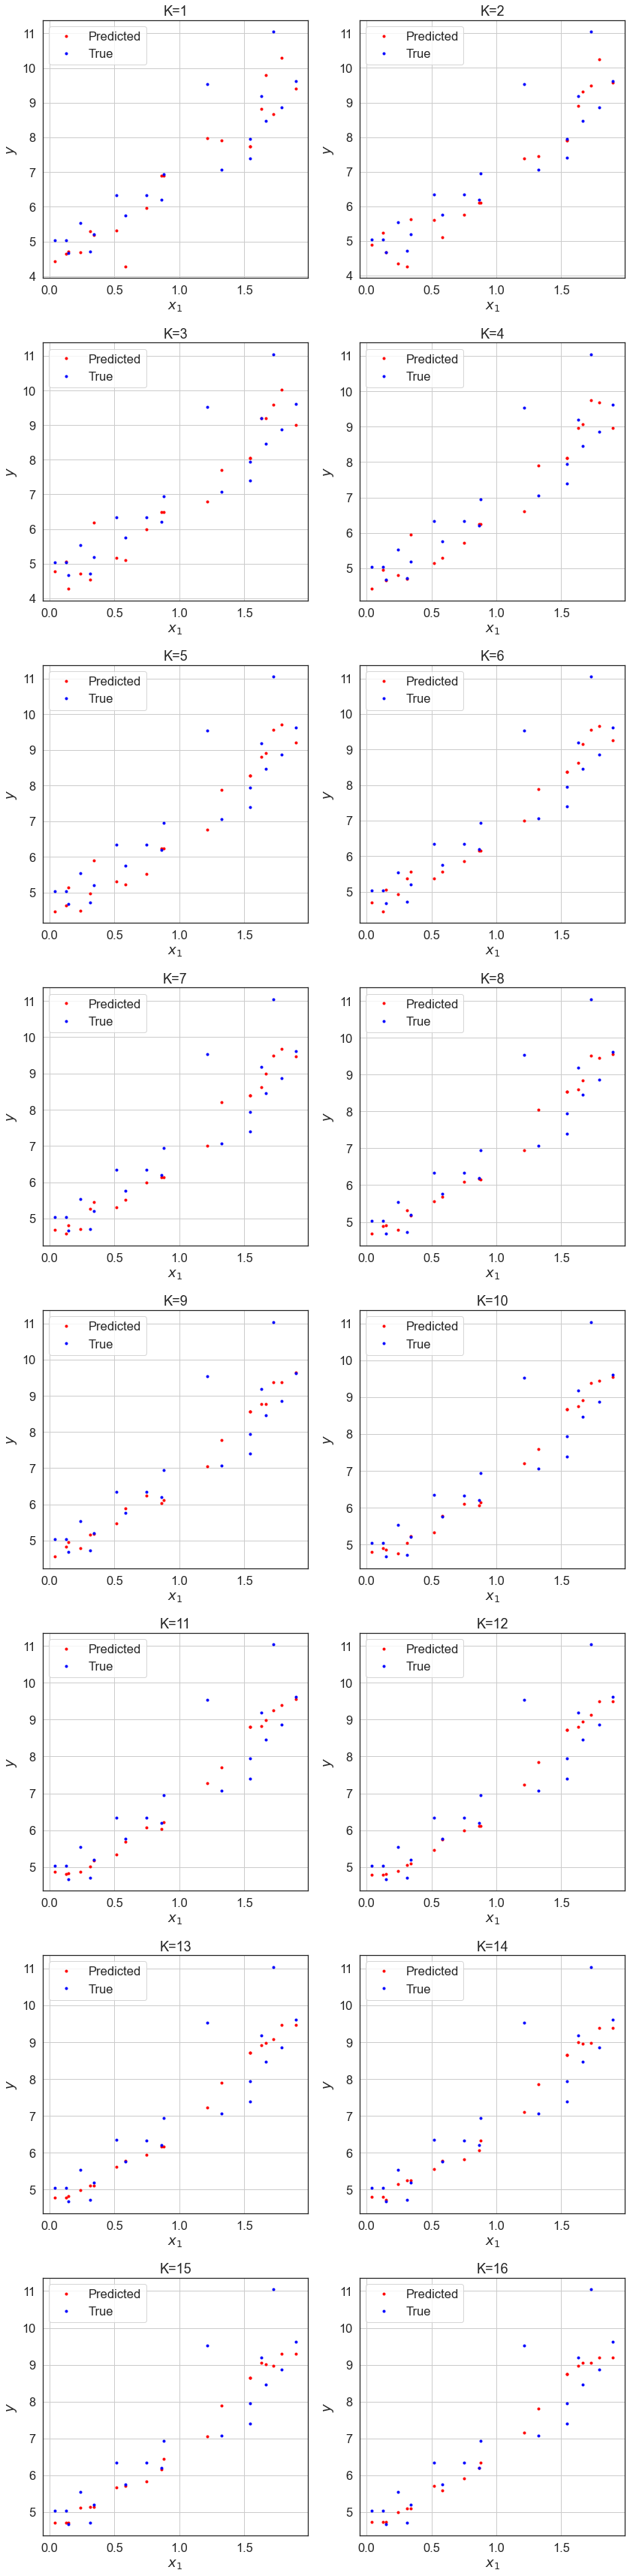

In [19]:
figure, axis = plt.subplots(8, 2, figsize=(12, 48))
axis = axis.ravel()

error_list = []
for i in range(16):
    model = KNN(i+1, task_type='Regression')

    model.fit(X_train, y_train)

    y_test_predicted = np.zeros_like(y_test)

    for j in range(X_test.shape[0]):
        y_test_predicted[j], _ = model.predict(X_test[j, :])

    error_list.append(np.sum(np.power(y_test - y_test_predicted, 2)))

    #plot predictions
    axis[i].plot(X_test, y_test_predicted, "r.")

    #plot ground truth
    axis[i].plot(X_test, y_test, "b.") 
    axis[i].legend(["Predicted", "True"])

    #set title
    axis[i].set_title(f"K={i+1}")

    axis[i].grid("True")
    axis[i].set(xlabel="$x_1$", ylabel = "$y$")

figure.tight_layout()
plt.show()

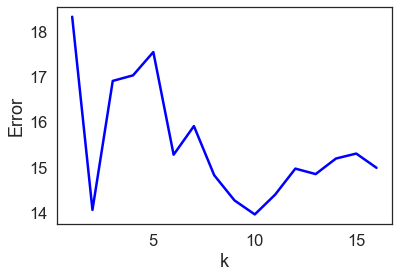

In [20]:
plt.plot(np.arange(len(error_list))+1, error_list, 'b-')
plt.xlabel("k")
plt.ylabel("Error"); # choose k = 10